# Predictive Analysis of Phishing Websites with ML

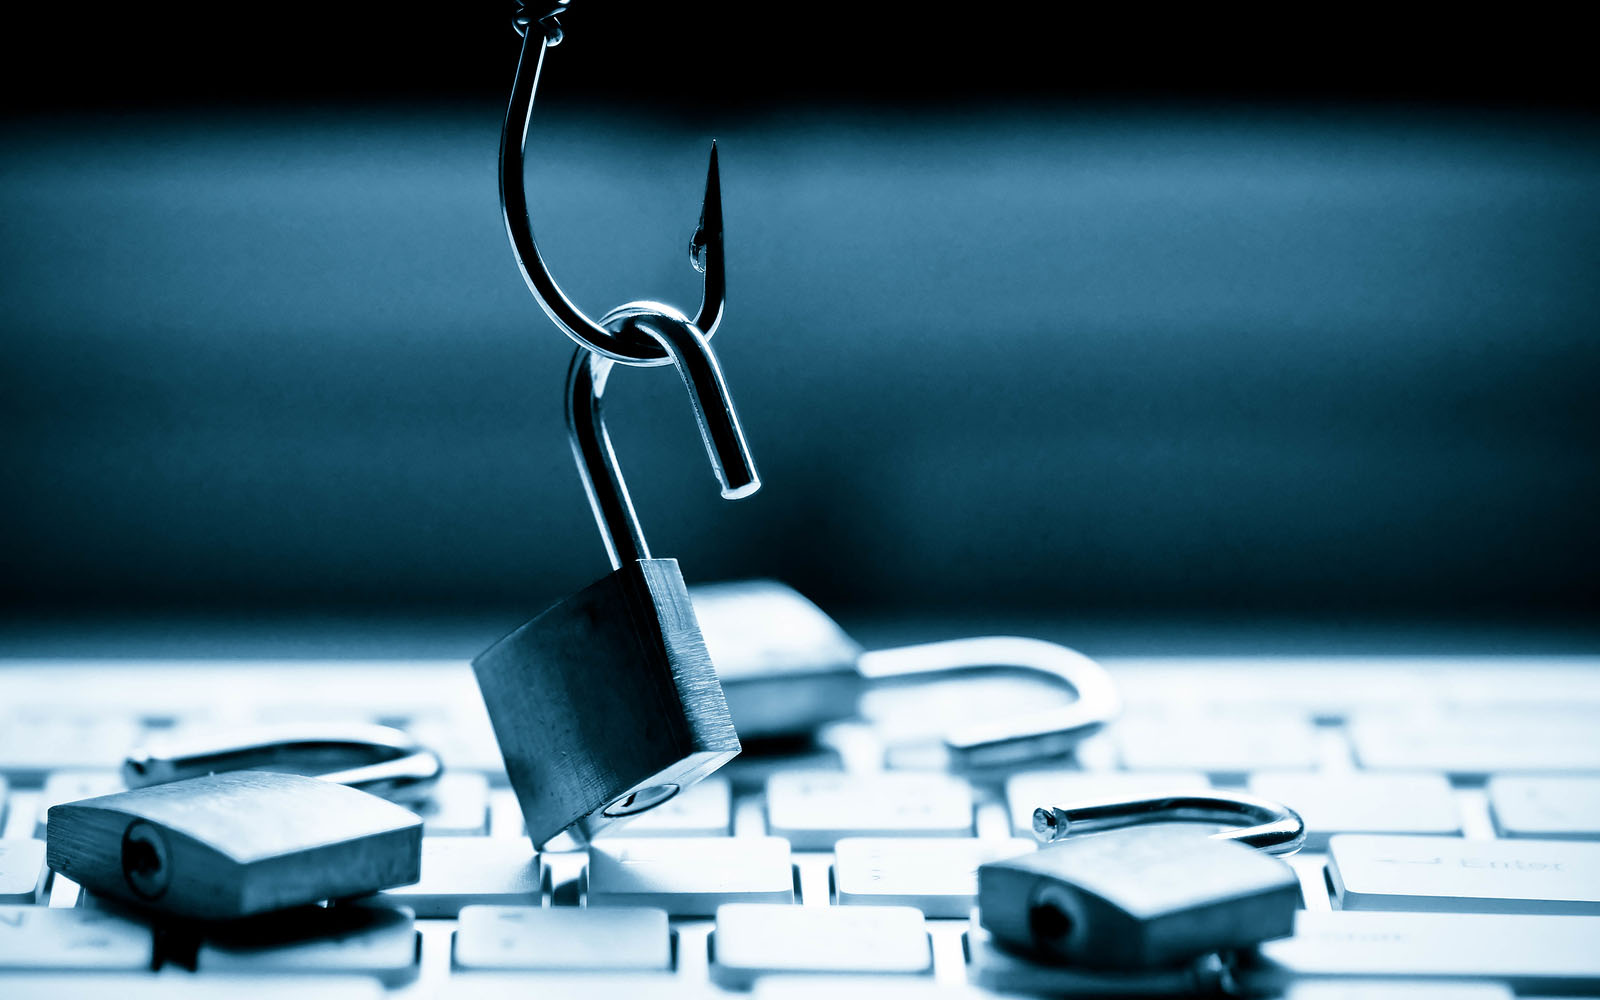

## Introduction 

In the digital era, cybersecurity is paramount, especially for financial institution entrusted with safeguarding sensitive customer data. Phishing attacks, which deceive users into divulging confidential information, pose a significant threat to a company's security and reputation. As the data scientist employed at Chumz Bank my main objective was to design a predictive model that accurately identifies a phishing website from a legitimate website.

I decided to tackle the problem using machine learning techniques over simple data analysis techniques because there are intricate patterns in phishing tactics that can be identified through machine learning that are often missed by rule-based techniques. Machine learning also evolves with emerging threats, offering more robust and future-proof protection.

By feature engineering, model development, evaluation and tuning, a website phishing detection model was developed to combat the threat faced by Chumz Bank.

## Business Understanding

As Chumz Bank experiences growth and seeks to solidify its market position, ensuring the security of its digital platforms becomes increasingly vital. Phishing attacks are very common where fraudulent websites impersonate the bank to deceive customers into revealing sensitive information, such as login credentials and financial details can lead to significant financial losses, legal liabilities, and severe damage to the bank’s reputation. Traditional security measures are not sufficient enough to protect customers and the bank's digital assets. The goal is to develop a robust and adaptive solution that can effectively detect and prevent phishing attempts.

## Data Understanding

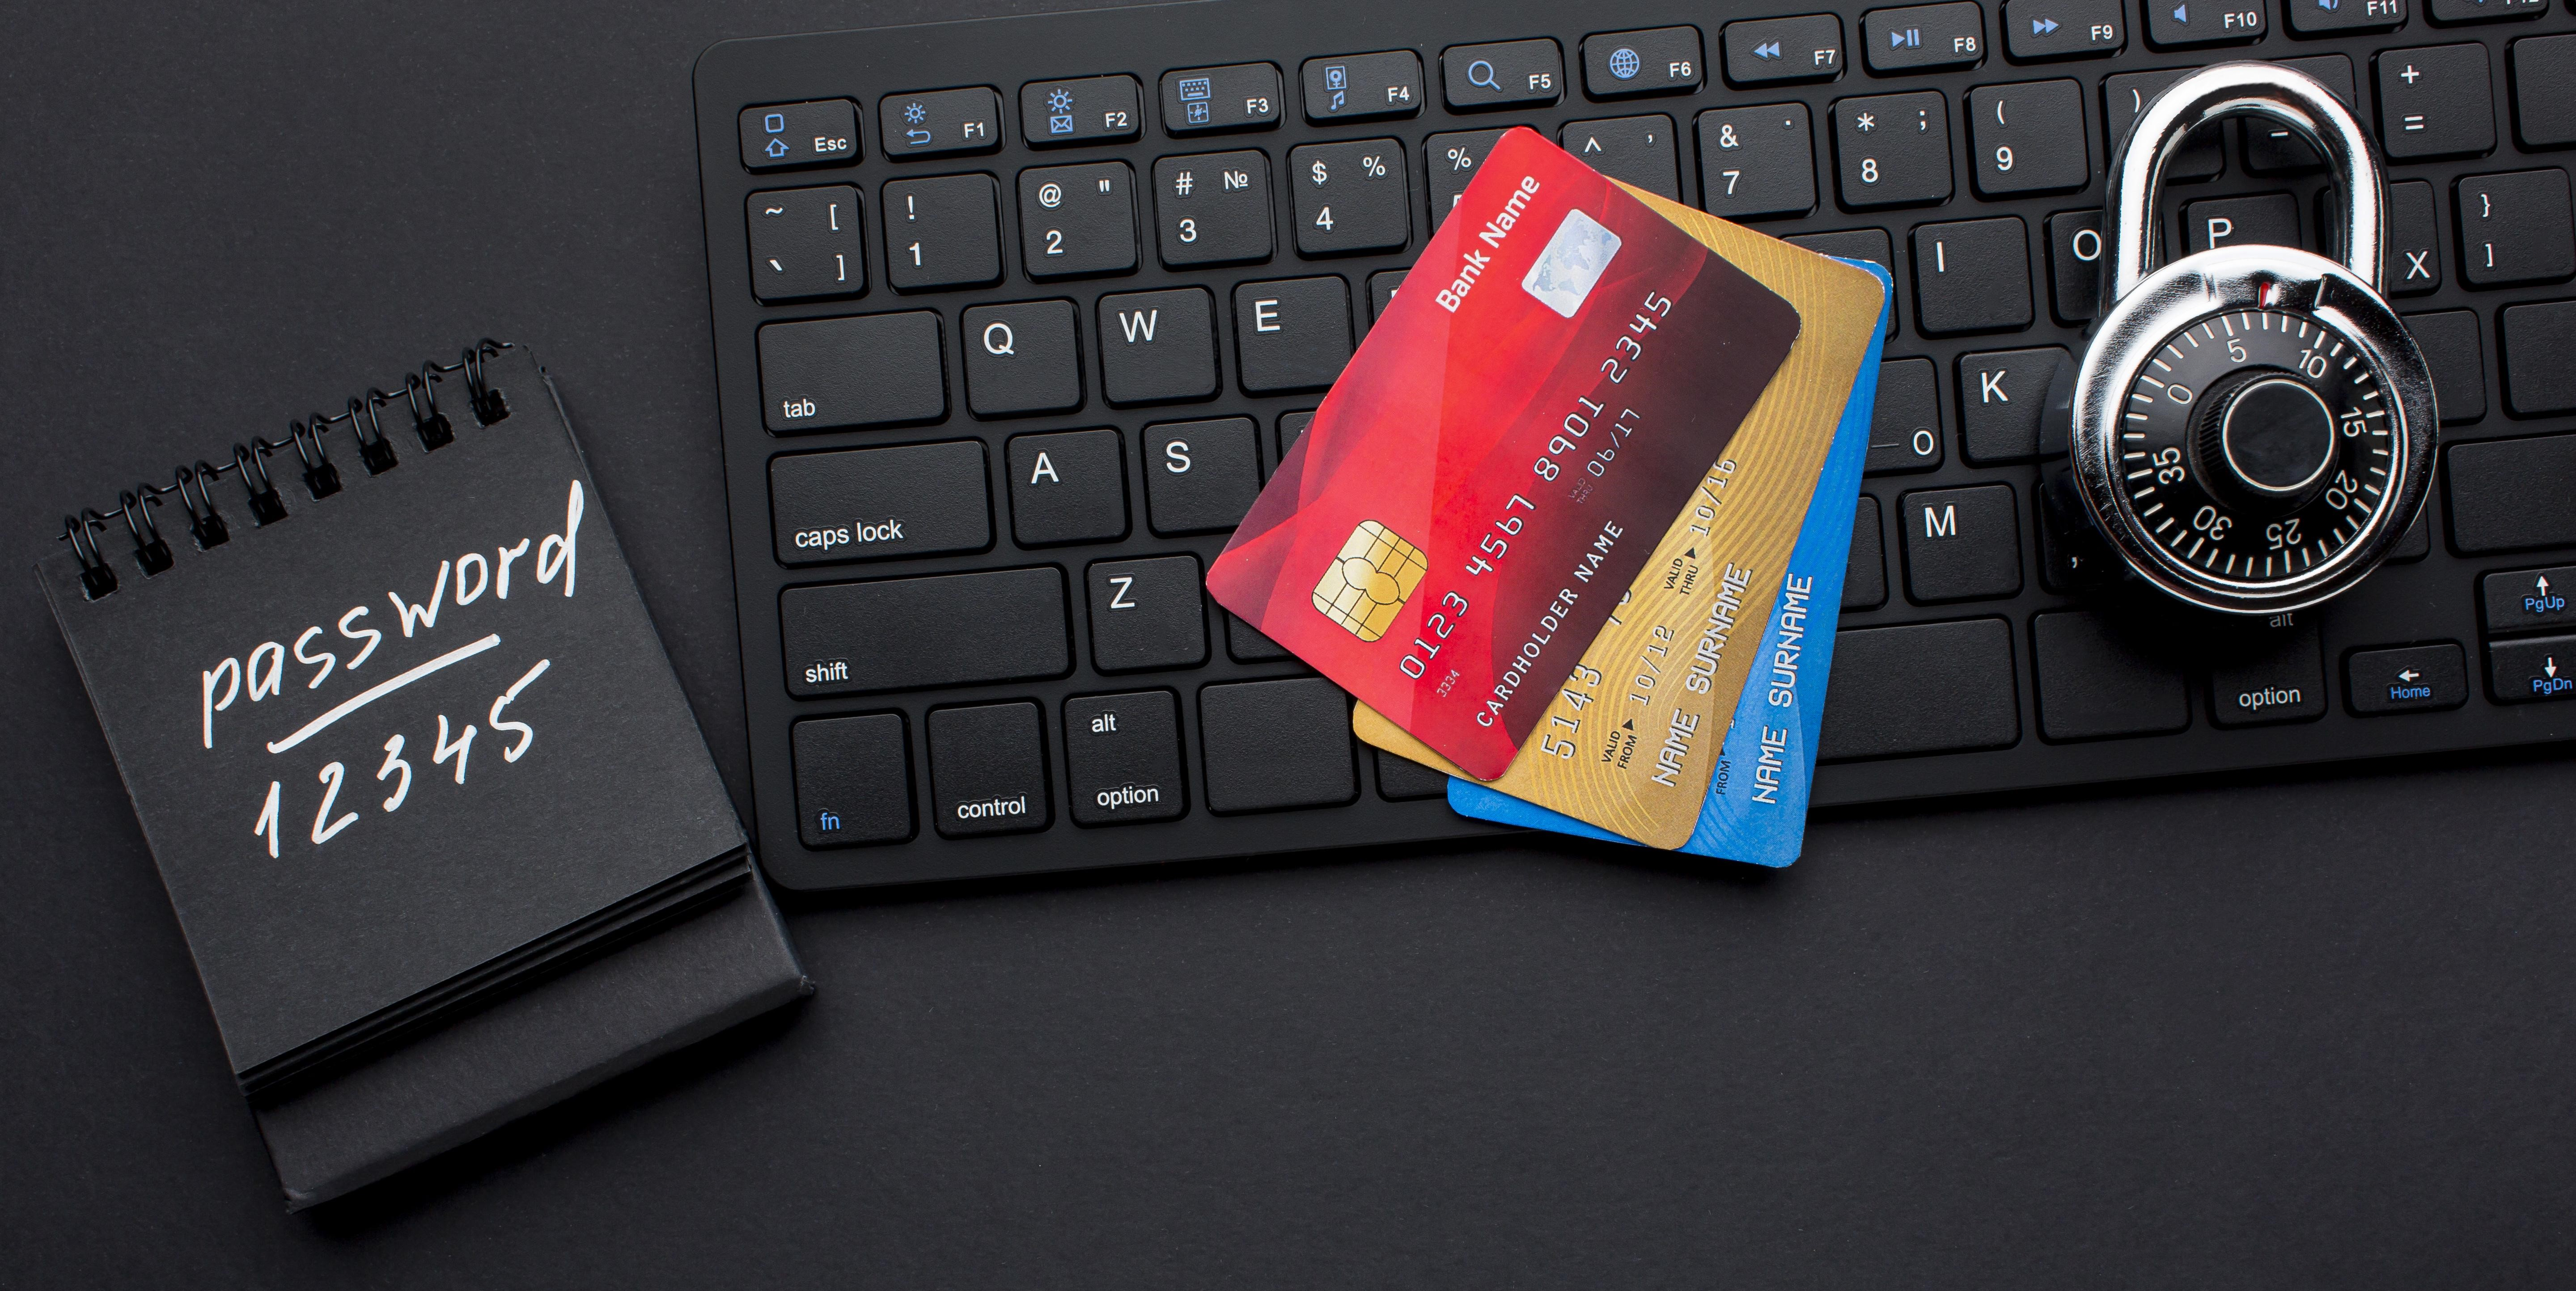

Two datasets from [Kaggle](https://www.kaggle.com/) were explored to see which one would best fit the solution.

[<u>**Web Page Phishing Dataset**</u>](https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset)
- This dataset is the result of merging two datasets with identical features. Selective feature inclusion was done to retain the most relevant data and to avoid redundancy.
- The dataset had no missing data which posed as a good candidate for the modelling.
- It contains features like:
   1. url_length: The length of the URL.
   2. n_dots: The count of ‘.’ characters in the URL.
   3. n_hypens: The count of ‘-’ characters in the URL.
   4. n_underline: The count of ‘_’ characters in the URL.
   5. n_slash: The count of ‘/’ characters in the URL.

[<u>**Content-based Features Phishing and Legit Websites**</u>](https://www.kaggle.com/datasets/yuvistrange/content-based-features-phishing-and-legit-websites)
- The Dataset comprises 50,000 Websites each having numerical values for all the scraped 43 Content-based Features, with 25,000 labelled as Phishing Websites (assigned Label 1) and 25,000 as Legitimate Websites (assigned Label 0) meaning it has a balanced target class. Content-based Features for each website were extracted using web scraping techniques, specifically Beautiful Soup.
- This dataset also did not contain any missing data.
- It contains features like:
  1. URL
  2. label
  3. number_of_buttons
  4. number_of_images 
  5. has_title
  6. has_input


Both datasets were published this year (2024) which means the datasets captures the rapidly evolving phishing tactics used by attackers. This will make the analysis and solutions produced more relevant to current security challenges. 

### Reading and Checking Data

#### Dataset 1

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('Data/web-page-phishing.csv')
data1

url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0               37       3         0            0        0               0   
1               77       1         0            0        0               0   
2              126       4         1            2        0               1   
3               18       2         0            0        0               0   
4               55       2         2            0        0               0   
...            ...     ...       ...          ...      ...             ...   
100072          23       3         1            0        0               0   
100073          34       2         0            0        0               0   
100074          70       2         1            0        5               0   
100075          28       2         0            0        1               0   
100076          16       2         0            0        0               0   

        n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  \
0             0     0      0              0        0        0        0   
1             0     0      0              0        0        0        0   
2             3     0      2              0        0        0        0   
3             0     0      0              0        0        0        0   
4             0     0      0              0        0        0        0   
...         ...   ...    ...            ...      ...      ...      ...   
100072        0     0      0              0        0        0        0   
100073        0     0      0              0        0        0        0   
100074        0     0      0              0        0        0        0   
100075        0     0      0              0        0        0        0   
100076        0     0      0              0        0        0        0   

        n_plus  n_asterisk  n_hastag  n_dollar  n_percent  n_redirection  \
0            0           0         0         0          0              0   
1            0           0         0         0          0              1   
2            0           0         0         0          0              1   
3            0           0         0         0          0              1   
4            0           0         0         0          0              1   
...        ...         ...       ...       ...        ...            ...   
100072       0           0         0         0          0              0   
100073       0           0         0         0          0              2   
100074       0           0         0         0          0              0   
100075       0           0         0         0          0              0   
100076       0           0         0         0          0              0   

        phishing  
0              0  
1              1  
2              1  
3              0  
4              0  
...          ...  
100072         0  
100073         0  
100074         1  
100075         1  
100076         0  

[100077 rows x 20 columns]

In [3]:
data1.shape

(100077, 20)

- The fisrt dataset has 100,077 rows and 20 features.

Now let's check how the target class is distributed.

In [4]:
data1['phishing'].value_counts()

phishing
0    63715
1    36362
Name: count, dtype: int64

- The dataset is imbalanced with the 0 class being the majority.

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

- The dataset has no missing values and all the features are of numerical type.

#### Dataset 2

In [6]:
data2 = pd.read_csv('Data/legitimate_phishing_structured_dataset.csv')
data2

URL  label  has_title  \
0                                         http://amc.com      0          1   
1                                   http://salonized.com      0          1   
2                                   http://swissborg.com      0          1   
3                           http://virginmoneygiving.com      0          1   
4      http://www.formbuddy.com/cgi-bin/formdisp.pl?u...      1          1   
...                                                  ...    ...        ...   
49995           https://sites.google.com/view/akrafdolmi      1          1   
49996                            http://malwarebytes.org      0          1   
49997    https://korzo.ir/Webmail/24/Webmail/webmail.php      1          1   
49998  https://bafybeidlb5ejiem7hie723et6gbwymkmudtpm...      1          1   
49999          https://daviddawson22.wixsite.com/my-site      1          1   

       has_input  has_button  has_image  has_submit  has_link  has_password  \
0              1           1          0           0         1             0   
1              0           0          0           0         1             0   
2              1           1          0           0         1             0   
3              0           0          0           0         1             0   
4              1           0          0           1         0             0   
...          ...         ...        ...         ...       ...           ...   
49995          1           1          0           0         1             1   
49996          1           1          1           1         1             0   
49997          1           1          0           0         1             1   
49998          1           1          0           0         1             0   
49999          1           1          0           0         1             0   

       has_email_input  ...  has_text_area  has_iframe  has_text_input  \
0                    1  ...              0           1               0   
1                    0  ...              0           1               0   
2                    1  ...              0           1               1   
3                    0  ...              0           1               0   
4                    0  ...              0           0               1   
...                ...  ...            ...         ...             ...   
49995                1  ...              0           0               0   
49996                0  ...              0           1               1   
49997                0  ...              0           0               1   
49998                0  ...              0           0               0   
49999                1  ...              0           0               1   

       number_of_meta  has_nav  has_object  has_picture  number_of_sources  \
0                 327        0           0            0                  0   
1                  23        1           0            1                  9   
2                  15        1           0            0                  0   
3                  27        1           0            0                  0   
4                   0        0           0            0                  0   
...               ...      ...         ...          ...                ...   
49995               5        0           0            0                  0   
49996              31        1           0            1                 10   
49997               4        0           0            0                  0   
49998               5        0           0            0                  0   
49999              18        0           0            0                  0   

       number_of_span  number_of_table  
0                 131                0  
1                   4                0  
2                  77                0  
3                 120                0  
4                   0                1  
...               ...              ...  
49995               6                0  
49996        

In [7]:
data2.shape

(50000, 45)

- The second dataset has 50,000 rows and 45 features.

Now let's check how the target class is distributed.

In [8]:
data2['label'].value_counts()

label
0    25000
1    25000
Name: count, dtype: int64

- The datasets has the target class perfectly balanced! This is good because it means saving time on preprocessing like applying SMOTE technique for resampling the class.

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   URL                         50000 non-null  object
 1   label                       50000 non-null  int64 
 2   has_title                   50000 non-null  int64 
 3   has_input                   50000 non-null  int64 
 4   has_button                  50000 non-null  int64 
 5   has_image                   50000 non-null  int64 
 6   has_submit                  50000 non-null  int64 
 7   has_link                    50000 non-null  int64 
 8   has_password                50000 non-null  int64 
 9   has_email_input             50000 non-null  int64 
 10  has_hidden_element          50000 non-null  int64 
 11  has_audio                   50000 non-null  int64 
 12  has_video                   50000 non-null  int64 
 13  number_of_inputs            50000 non-null  in

- The dataset does not have an missing values and all the columns are of numeric type.

#### Conclusion

We will proceed with the second dataset named `legitimate_phishing_structured_dataset` because it has more features which means more insights, has majority of the pre-processing steps conducted for us and most importantly, has the target class balanced. 

## Data Preparation

In [10]:
df = pd.read_csv('Data/legitimate_phishing_structured_dataset.csv')
df.head()

URL  label  has_title  \
0                                     http://amc.com      0          1   
1                               http://salonized.com      0          1   
2                               http://swissborg.com      0          1   
3                       http://virginmoneygiving.com      0          1   
4  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...      1          1   

   has_input  has_button  has_image  has_submit  has_link  has_password  \
0          1           1          0           0         1             0   
1          0           0          0           0         1             0   
2          1           1          0           0         1             0   
3          0           0          0           0         1             0   
4          1           0          0           1         0             0   

   has_email_input  ...  has_text_area  has_iframe  has_text_input  \
0                1  ...              0           1               0   
1                0  ...              0           1               0   
2                1  ...              0           1               1   
3                0  ...              0           1               0   
4                0  ...              0           0               1   

   number_of_meta  has_nav  has_object  has_picture  number_of_sources  \
0             327        0           0            0                  0   
1              23        1           0            1                  9   
2              15        1           0            0                  0   
3              27        1           0            0                  0   
4               0        0           0            0                  0   

   number_of_span  number_of_table  
0             131                0  
1               4                0  
2              77                0  
3             120                0  
4               0                1  

[5 rows x 45 columns]

Some columns seem to be in 0s and 1s (boolean) while others are integral. Let's take a look at each column to see it's unique values.

In [11]:
df.columns

Index(['URL', 'label', 'has_title', 'has_input', 'has_button', 'has_image',
       'has_submit', 'has_link', 'has_password', 'has_email_input',
       'has_hidden_element', 'has_audio', 'has_video', 'number_of_inputs',
       'number_of_buttons', 'number_of_images', 'number_of_option',
       'number_of_list', 'number_of_th', 'number_of_tr', 'number_of_href',
       'number_of_paragraph', 'number_of_script', 'length_of_title', 'has_h1',
       'has_h2', 'has_h3', 'length_of_text', 'number_of_clickable_button',
       'number_of_a', 'number_of_img', 'number_of_div', 'number_of_figure',
       'has_footer', 'has_form', 'has_text_area', 'has_iframe',
       'has_text_input', 'number_of_meta', 'has_nav', 'has_object',
       'has_picture', 'number_of_sources', 'number_of_span',
       'number_of_table'],
      dtype='object')

In [12]:
for column in df:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in URL: ['http://amc.com' 'http://salonized.com' 'http://swissborg.com' ...
 'https://korzo.ir/Webmail/24/Webmail/webmail.php'
 'https://bafybeidlb5ejiem7hie723et6gbwymkmudtpmzlh7c5v2wntin4h352dyq.ipfs.w3s.link/'
 'https://daviddawson22.wixsite.com/my-site']
Unique values in label: [0 1]
Unique values in has_title: [1 0]
Unique values in has_input: [1 0]
Unique values in has_button: [1 0]
Unique values in has_image: [0 1]
Unique values in has_submit: [0 1]
Unique values in has_link: [1 0]
Unique values in has_password: [0 1]
Unique values in has_email_input: [1 0]
Unique values in has_hidden_element: [0 1]
Unique values in has_audio: [0 1]
Unique values in has_video: [0 1]
Unique values in number_of_inputs: [   1    0    2   11    4   10   31    9    6    3   18   30   26   51
   19    7   12    5   17    8   24   13   14  221   29   34   27   20
   70   21   54   99   41   16   33   42   28   92   25   22   32   37
   23   67   15   82   39  288   60   48   44   83  152 

- Scaling will be needed to normalize or standardize the data for effective machine learning.

#### 1. Feature engineering 

The first dataset had all it's features extracted from a website's URL link. Our dataset has `URL` as one of the features so let's extract a couple of more features from the `URL` column. 

In [13]:
# function to extract features from URL column
def extract_url_features(df):
    df['url_length'] = df['URL'].apply(len)
    df['num_subdomains'] = df['URL'].apply(lambda x: x.count('.'))
    df['has_https'] = df['URL'].apply(lambda x: 1 if 'https' in x else 0)
    df['num_of_special_characters'] = df['URL'].apply(lambda x: sum([1 for char in x if not char.isalnum() and char != '.']))
    return df

# Apply the function to your dataset
data = extract_url_features(df)
df.head()

URL  label  has_title  \
0                                     http://amc.com      0          1   
1                               http://salonized.com      0          1   
2                               http://swissborg.com      0          1   
3                       http://virginmoneygiving.com      0          1   
4  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...      1          1   

   has_input  has_button  has_image  has_submit  has_link  has_password  \
0          1           1          0           0         1             0   
1          0           0          0           0         1             0   
2          1           1          0           0         1             0   
3          0           0          0           0         1             0   
4          1           0          0           1         0             0   

   has_email_input  ...  has_nav  has_object  has_picture  number_of_sources  \
0                1  ...        0           0            0                  0   
1                0  ...        1           0            1                  9   
2                1  ...        1           0            0                  0   
3                0  ...        1           0            0                  0   
4                0  ...        0           0            0                  0   

   number_of_span  number_of_table  url_length  num_subdomains  has_https  \
0             131                0          14               1          0   
1               4                0          20               1          0   
2              77                0          20               1          0   
3             120                0          28               1          0   
4               0                1          62               3          0   

   num_of_special_characters  
0                          3  
1                          3  
2                          3  
3                          3  
4                         11  

[5 rows x 49 columns]

In [14]:
df.shape

(50000, 49)

- The columns have increased from 45 to 49. We have added `url_length`, `num_subdomains`, `has_https` and `num_of_special_characters`.

#### 2. Feature Selection

49 features might be quite a lot. Let's see if all of them are relevant.

In [15]:
df.columns

Index(['URL', 'label', 'has_title', 'has_input', 'has_button', 'has_image',
       'has_submit', 'has_link', 'has_password', 'has_email_input',
       'has_hidden_element', 'has_audio', 'has_video', 'number_of_inputs',
       'number_of_buttons', 'number_of_images', 'number_of_option',
       'number_of_list', 'number_of_th', 'number_of_tr', 'number_of_href',
       'number_of_paragraph', 'number_of_script', 'length_of_title', 'has_h1',
       'has_h2', 'has_h3', 'length_of_text', 'number_of_clickable_button',
       'number_of_a', 'number_of_img', 'number_of_div', 'number_of_figure',
       'has_footer', 'has_form', 'has_text_area', 'has_iframe',
       'has_text_input', 'number_of_meta', 'has_nav', 'has_object',
       'has_picture', 'number_of_sources', 'number_of_span', 'number_of_table',
       'url_length', 'num_subdomains', 'has_https',
       'num_of_special_characters'],
      dtype='object')

In [16]:
df['number_of_images'].unique()

array([  0,   1,   2,   4,   3,   6,  11,  22,   8,   5,  28,   7,   9,
        66,  24,  16,  14,  12, 278,  10, 334, 304,  25,  17,  20,  13,
        56,  18,  19], dtype=int64)

In [17]:
df['number_of_img'].unique()

array([  92,   65,  182,   23,    0,    1,   52,   34,   54,   49,   35,
         20,   90,   46,   25,   93,   78,  133,    9,   81,    8,   37,
        106,    3,   45,    6,  204,    4, 1203,  174,   14,   94,   76,
         17,    2,   19,   64,  113,    7,   21,   27,   15,  187,    5,
         13,  270,   84,   11,   39,   32,   96,   22,  179,   24,   43,
         68,   40,   16,   38,   42,  193,  137,   72,  130,   41,   85,
         31,   79,   10,  148,   30,  154,  119,   83,   89,   71,   18,
         44,   50,   12,   26,   57,   55,  168,   82,  272,  129,   63,
        221,  107,  200,   28,   51,   62,  109,   74,  367,   58,   59,
        197,   70,  145,   95,  156,   87,  243,   33,  126,  127,   69,
        153,  253,   97,  108,  184,  102,   77,  131,   86,  190,  142,
        205,  183,   67,   66,  149,   53,   47,  191,  161,   29,  268,
        207,  120,   60,  328,  322,  132,   80,  160,  103,   36,   91,
        249,  196,  143,  176,  140,   48,  211,   

- `number_of_img` and `number_of_images` appear to be doing the same thing. We are going to drop `number_of_images` because it has lesser unique values.

Let's check the correlation of each feature to the target column `label`. Highly correlated features are the ones with a threshold higher than 0.8. 

In [18]:
df1 = df.copy()
df1 = df1.drop(columns=['URL', 'number_of_images'])

# calculating correlation of the features with the label column
cor = df1.corr()['label']

# displaying the correlation sorted by absolute value
cor_sorted = cor.abs().sort_values(ascending=False)
print(cor_sorted)

label                         1.000000
num_subdomains                0.707158
has_https                     0.612704
has_h2                        0.551394
has_nav                       0.550354
has_link                      0.545355
has_h3                        0.541677
length_of_title               0.537657
has_title                     0.537070
has_footer                    0.516781
has_h1                        0.465421
num_of_special_characters     0.432388
has_text_input                0.409898
number_of_div                 0.399989
number_of_script              0.395207
number_of_href                0.394015
has_input                     0.390174
has_button                    0.385172
has_iframe                    0.374440
has_form                      0.370976
url_length                    0.347651
number_of_img                 0.323289
number_of_a                   0.319970
has_picture                   0.286432
number_of_list                0.282199
length_of_text           

- None of the features are highly correlated to `label` so we will move on with all the features.

Variance is also used to determine how important a feature is. We will set our threshold to be 0.01 and features with a variance less than that will be dropped.

In [19]:
# Calculate variance of the features (excluding 'URL')
variance = df1.var()

# Print the variance of each feature
print(variance)

label                         2.500050e-01
has_title                     2.078314e-01
has_input                     2.486047e-01
has_button                    2.452356e-01
has_image                     7.857431e-03
has_submit                    1.112609e-01
has_link                      2.211860e-01
has_password                  9.397688e-02
has_email_input               1.011450e-01
has_hidden_element            1.857009e-01
has_audio                     2.851877e-03
has_video                     3.987024e-02
number_of_inputs              2.281020e+02
number_of_buttons             3.598071e+02
number_of_option              6.431854e+03
number_of_list                2.261746e+04
number_of_th                  7.599783e+01
number_of_tr                  3.449079e+02
number_of_href                3.132834e+02
number_of_paragraph           5.987478e+03
number_of_script              4.435067e+02
length_of_title               7.923470e+02
has_h1                        2.375502e-01
has_h2     

In [20]:
# setting a variance threshold
var_threshold = 0.01

# identify features with low variance
low_var = variance[variance < var_threshold].index.tolist()
df2 = df1.drop(columns = low_var)
df2.shape

(50000, 44)

In [21]:
df1.shape

(50000, 47)

In [22]:
low_var

['has_image', 'has_audio', 'has_object']

- We have dropped `has_image`, `has_audio`, `has_object`.
- We are now going to work with 47 features.

## Data Visualization

### 1. Univariate

For easier plotting we are going to separate the columns into numerical (integer) and boolean (0, 1) categories.

In [23]:
df2.columns

Index(['label', 'has_title', 'has_input', 'has_button', 'has_submit',
       'has_link', 'has_password', 'has_email_input', 'has_hidden_element',
       'has_video', 'number_of_inputs', 'number_of_buttons',
       'number_of_option', 'number_of_list', 'number_of_th', 'number_of_tr',
       'number_of_href', 'number_of_paragraph', 'number_of_script',
       'length_of_title', 'has_h1', 'has_h2', 'has_h3', 'length_of_text',
       'number_of_clickable_button', 'number_of_a', 'number_of_img',
       'number_of_div', 'number_of_figure', 'has_footer', 'has_form',
       'has_text_area', 'has_iframe', 'has_text_input', 'number_of_meta',
       'has_nav', 'has_picture', 'number_of_sources', 'number_of_span',
       'number_of_table', 'url_length', 'num_subdomains', 'has_https',
       'num_of_special_characters'],
      dtype='object')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# selecting numerical columns
numerical_cols = [
    'number_of_inputs', 'number_of_buttons', 
    'number_of_option', 'number_of_list', 'number_of_th', 'number_of_tr', 
    'number_of_href', 'number_of_paragraph', 'number_of_script', 
    'length_of_title', 'length_of_text', 'number_of_clickable_button', 
    'number_of_a', 'number_of_img', 'number_of_div', 'number_of_figure', 
    'number_of_meta', 'number_of_sources', 'number_of_span', 
    'number_of_table', 'url_length', 'num_subdomains', 'num_of_special_characters'
]

# selecting categorical columns
bool_cols = [
    'label', 'has_title', 'has_input', 'has_button', 'has_submit', 
    'has_link', 'has_password', 'has_email_input', 'has_hidden_element', 
    'has_video', 'has_h1', 'has_h2', 'has_h3', 'has_footer', 'has_form', 
    'has_text_area', 'has_iframe', 'has_text_input', 'has_nav', 
    'has_picture', 'has_https'
]

The columns are so many hence will plot just 2 random features.

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


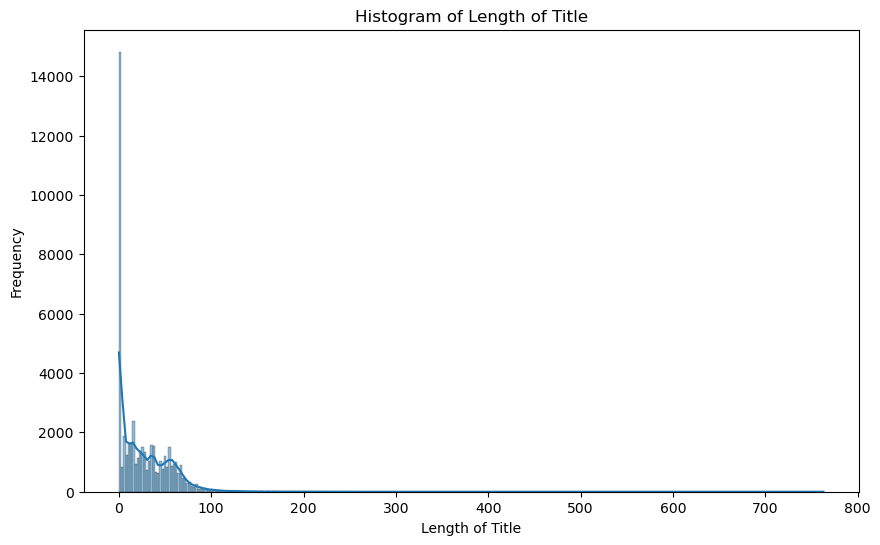

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


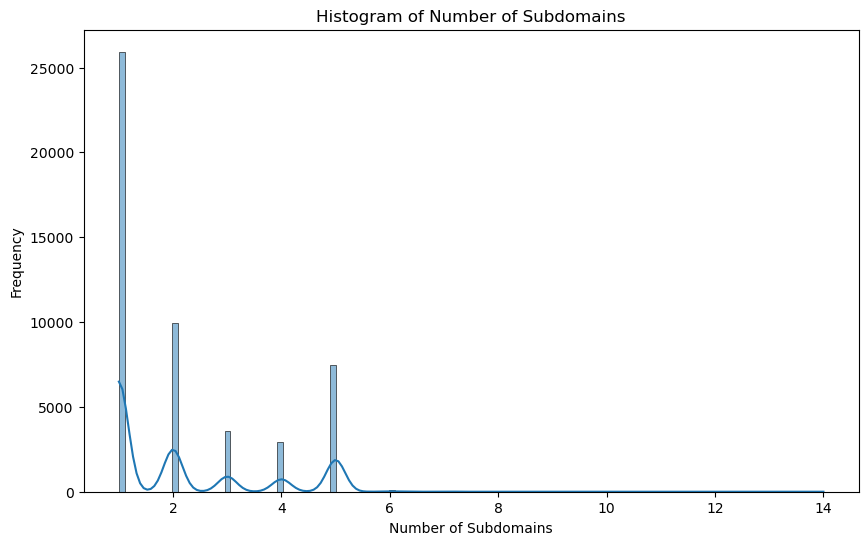

In [25]:
# plotting a histogram for length_of_title
plt.figure(figsize=(10, 6))
sns.histplot(df2['length_of_title'], kde=True)
plt.title('Histogram of Length of Title')
plt.xlabel('Length of Title')
plt.ylabel('Frequency')
plt.show()

# plotting a histogram for num_subdomains
plt.figure(figsize=(10, 6))
sns.histplot(df2['num_subdomains'], kde=True)
plt.title('Histogram of Number of Subdomains')
plt.xlabel('Number of Subdomains')
plt.ylabel('Frequency')
plt.show()

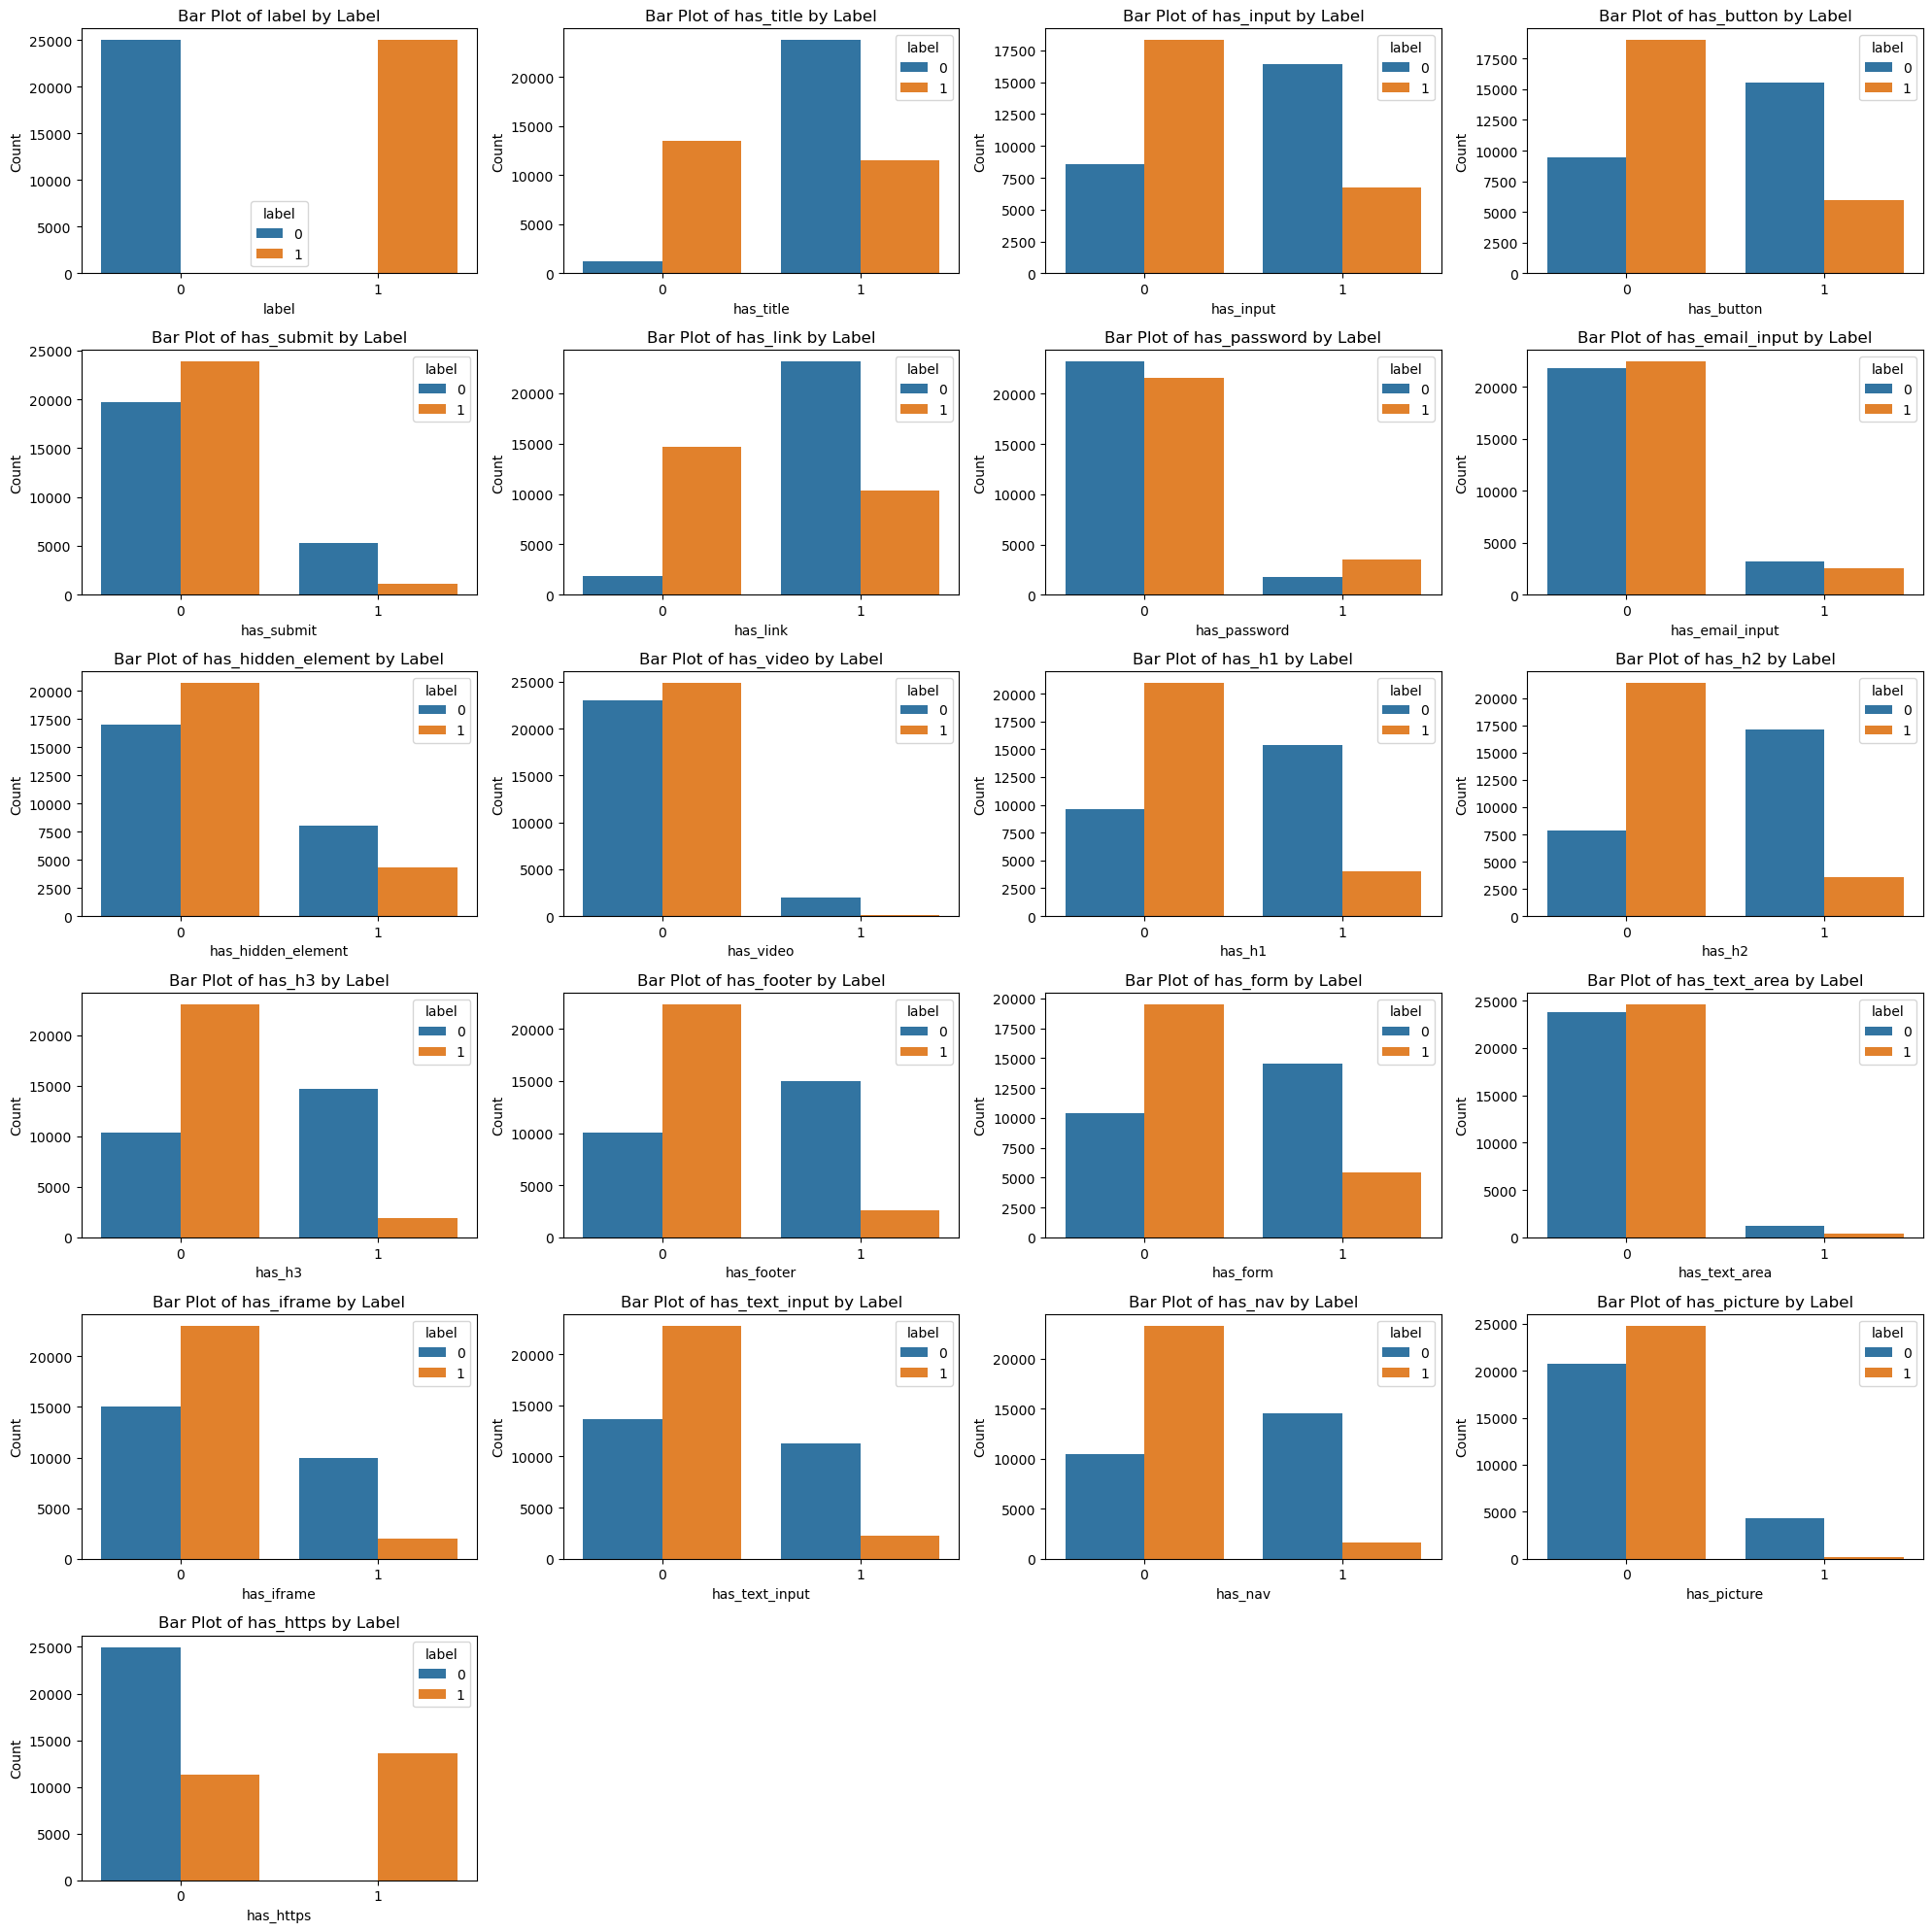

In [26]:
# bar plots for boolean Columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(bool_cols, 1):
    plt.subplot(6, 4, i)  # 6x4 grid for subplots
    sns.countplot(x=col, hue='label', data=df2)
    plt.title(f'Bar Plot of {col} by Label')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 2. Bivariate

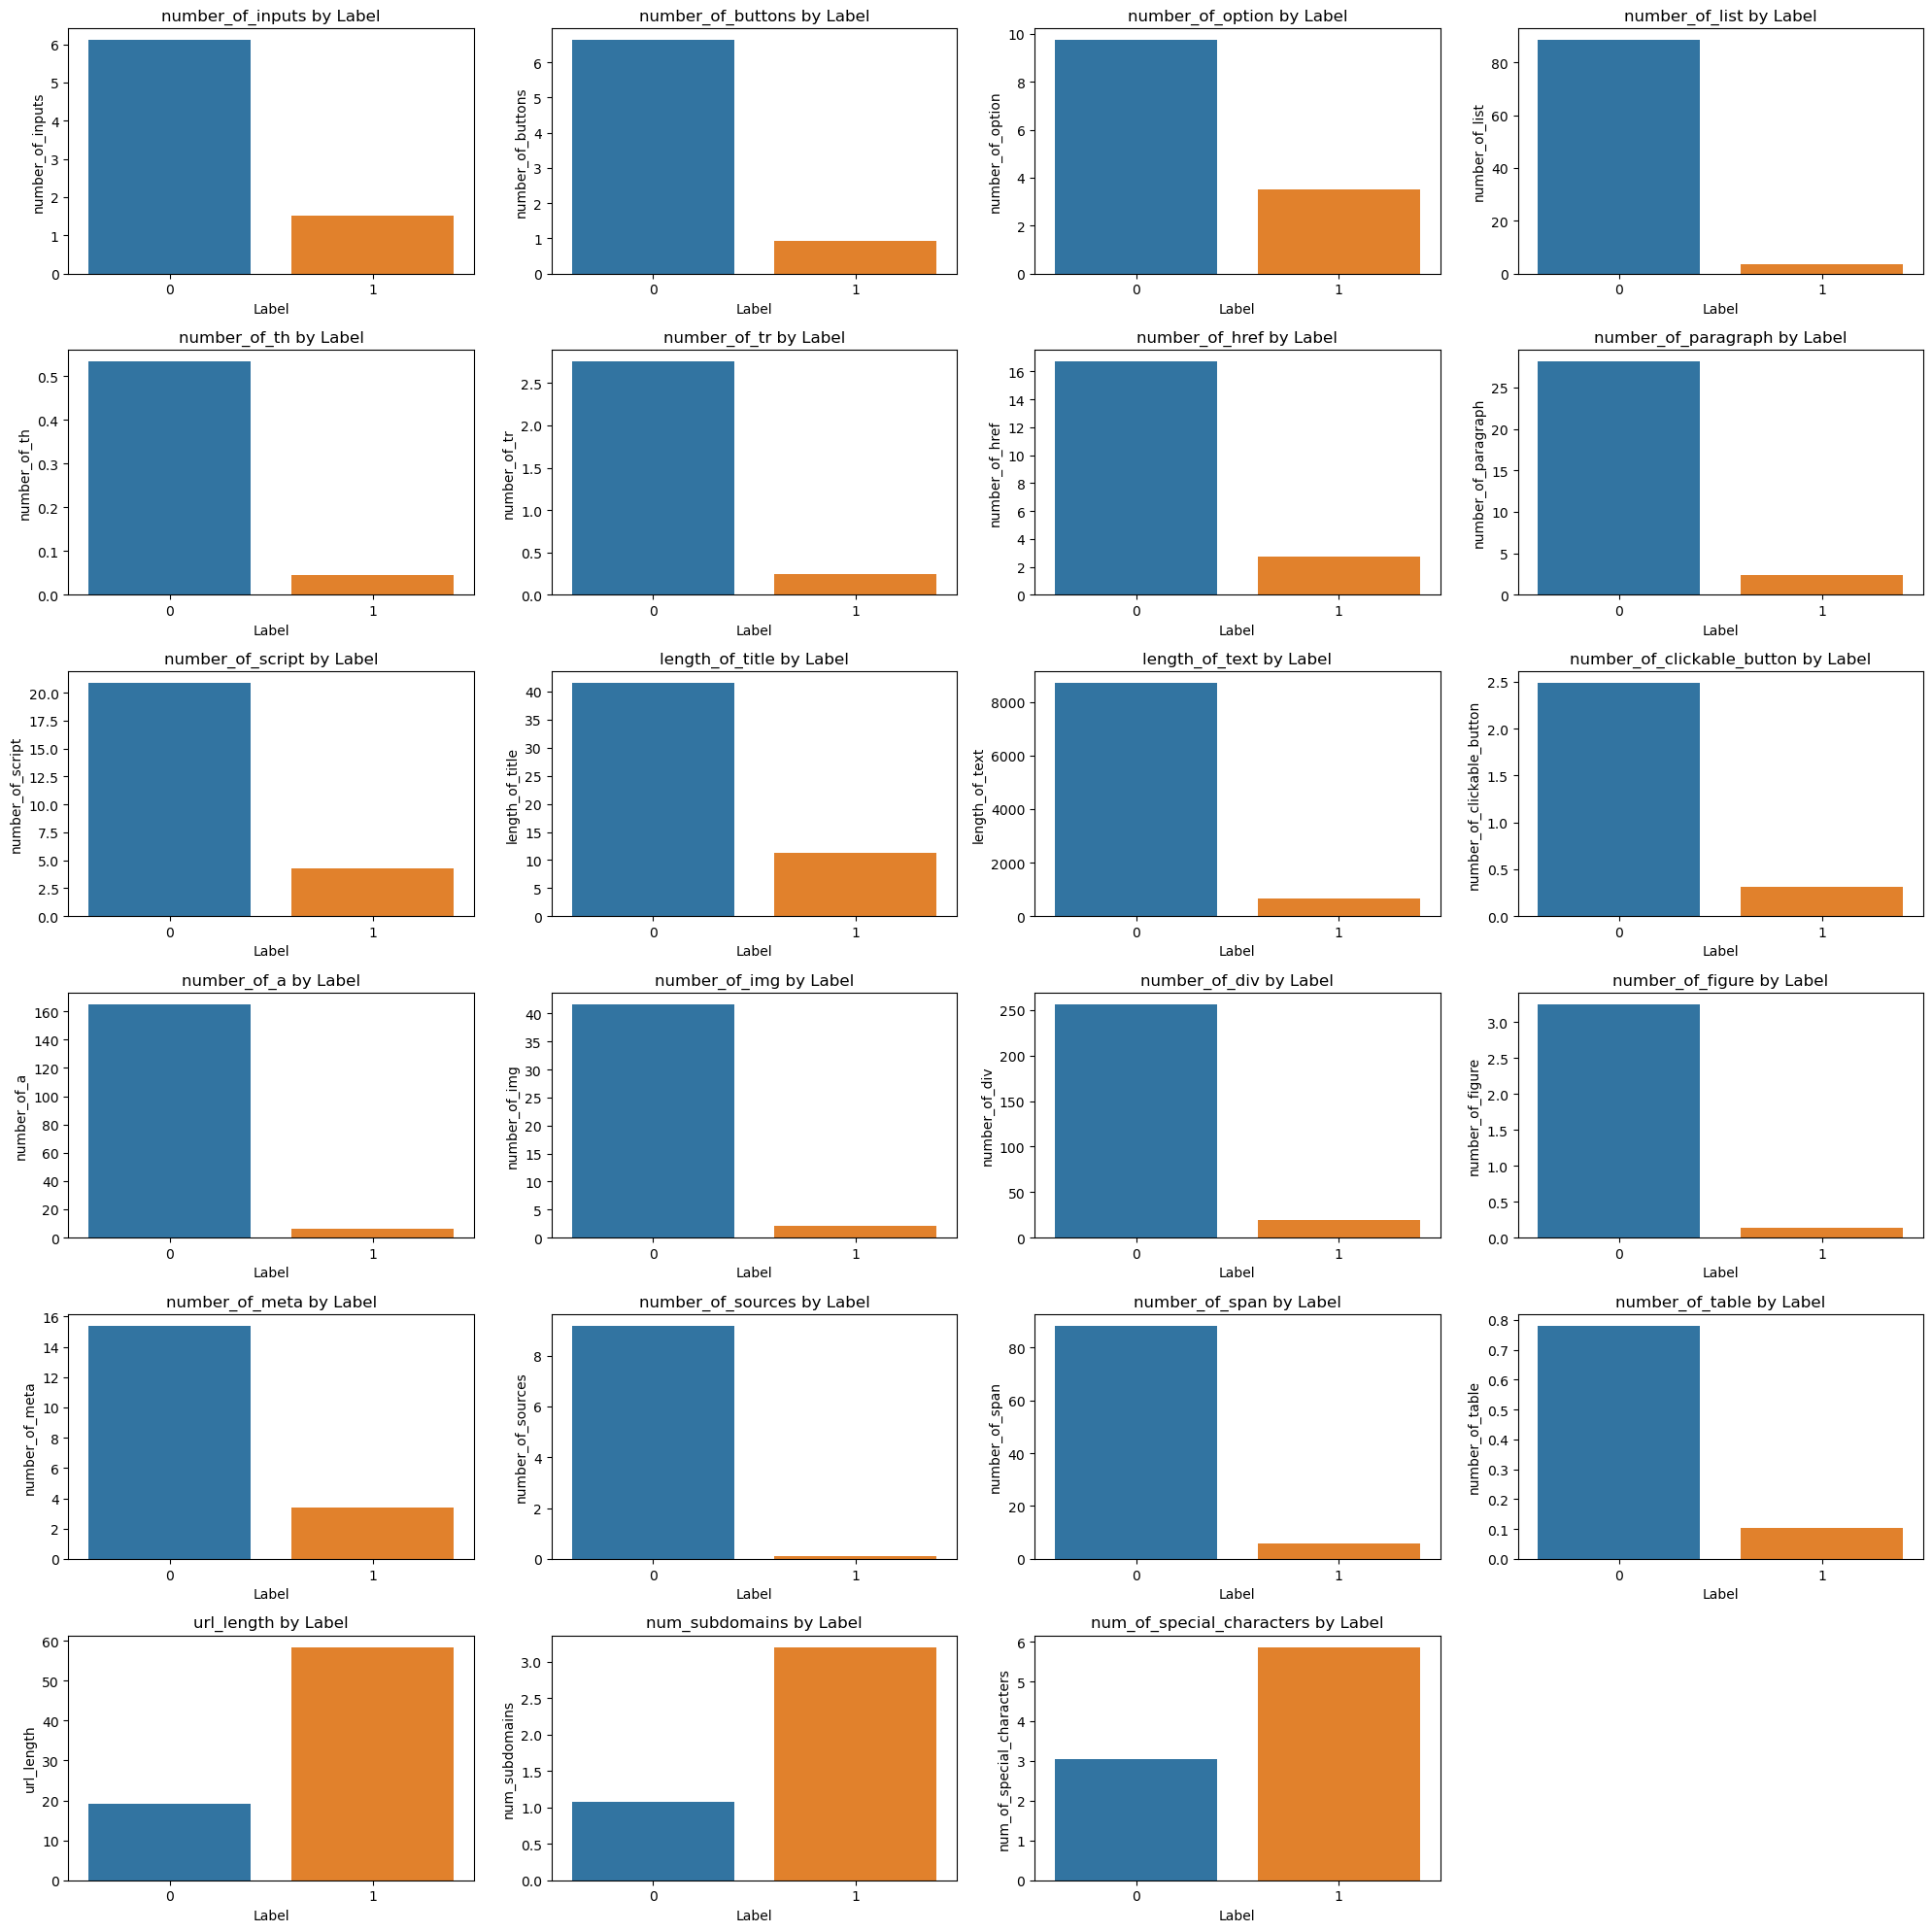

In [27]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 4, i)
    
    # calculating mean for each label
    mean_data = df2.groupby('label')[col].mean().reset_index()
    
    # plotting
    sns.barplot(x='label', y=col, data=mean_data)
    plt.title(f'{col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

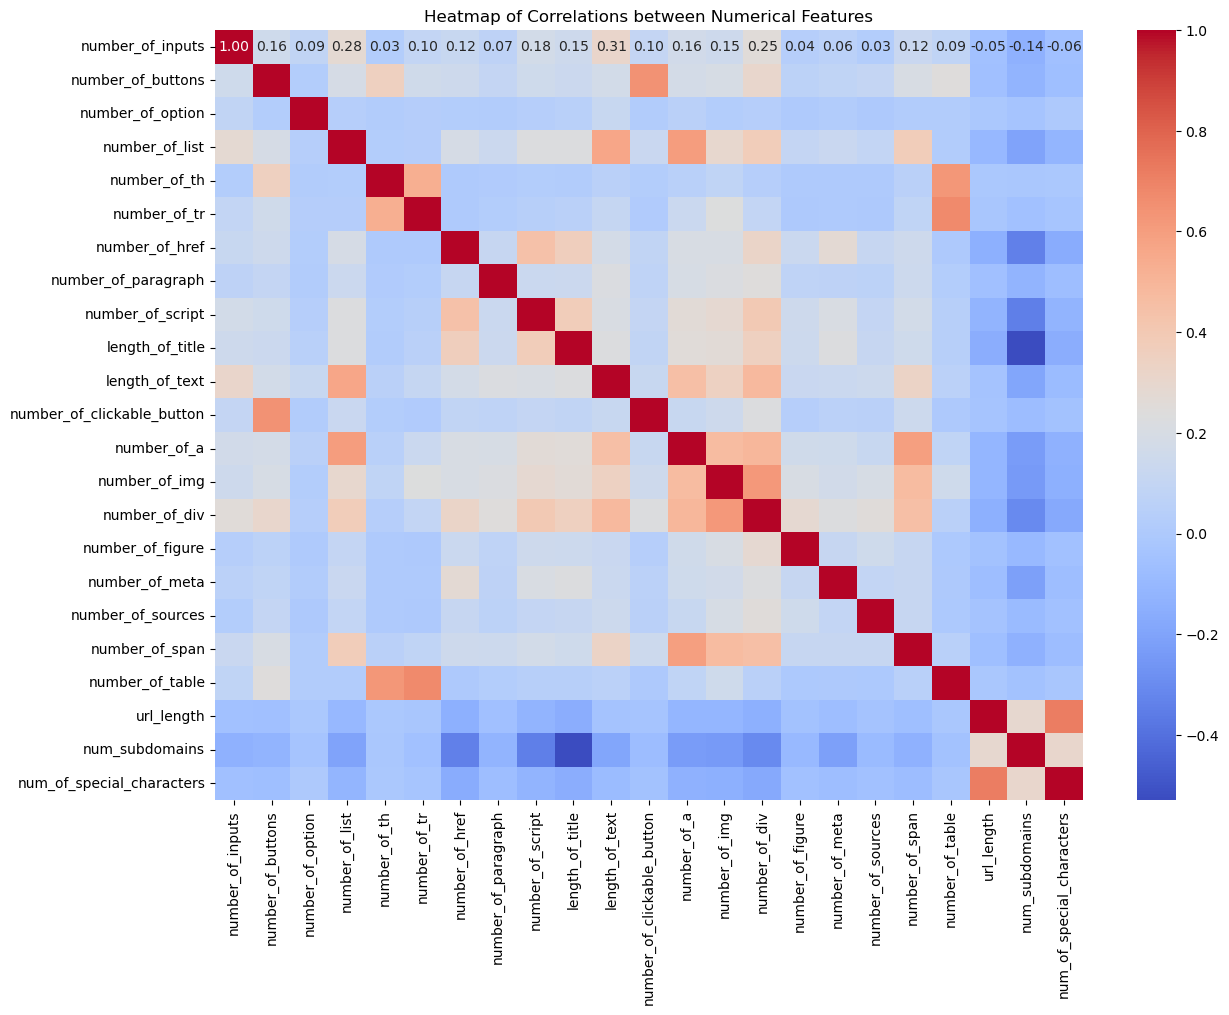

In [28]:
# heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(df2[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlations between Numerical Features')
plt.show()

### 3. Multivariate

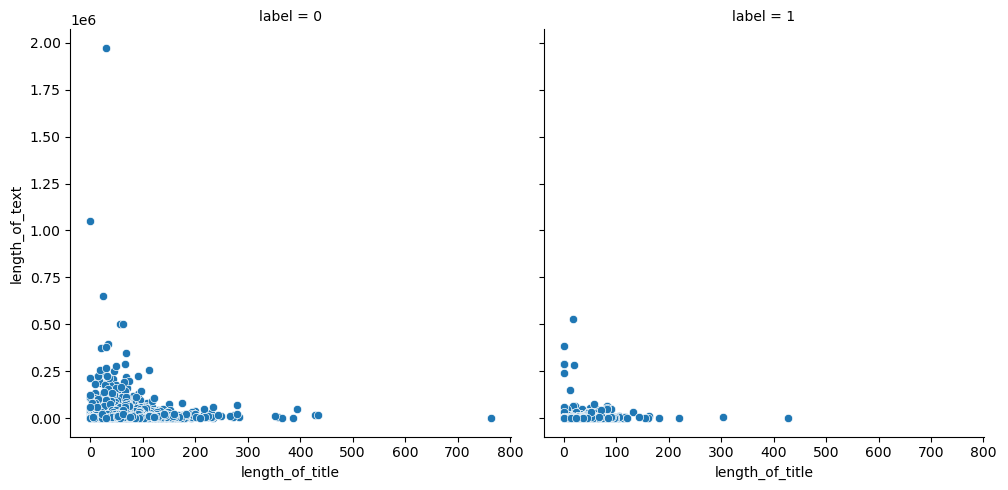

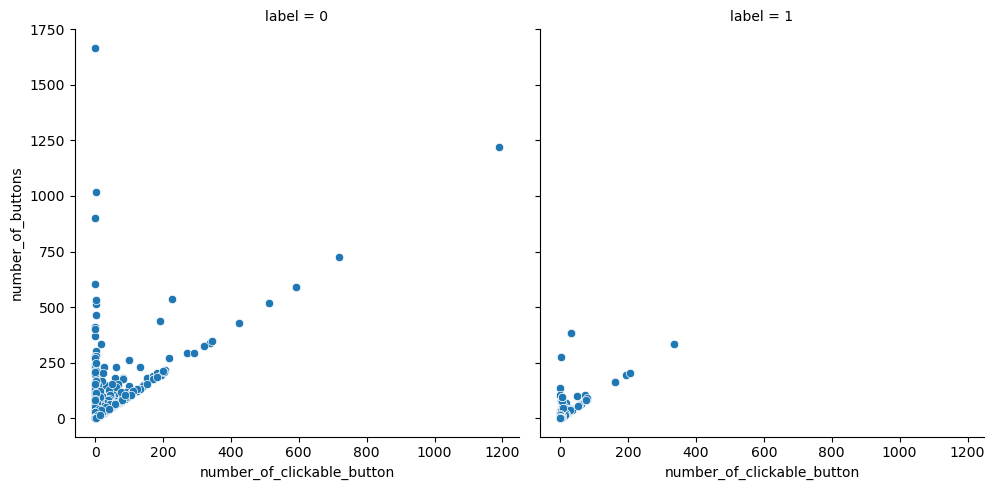

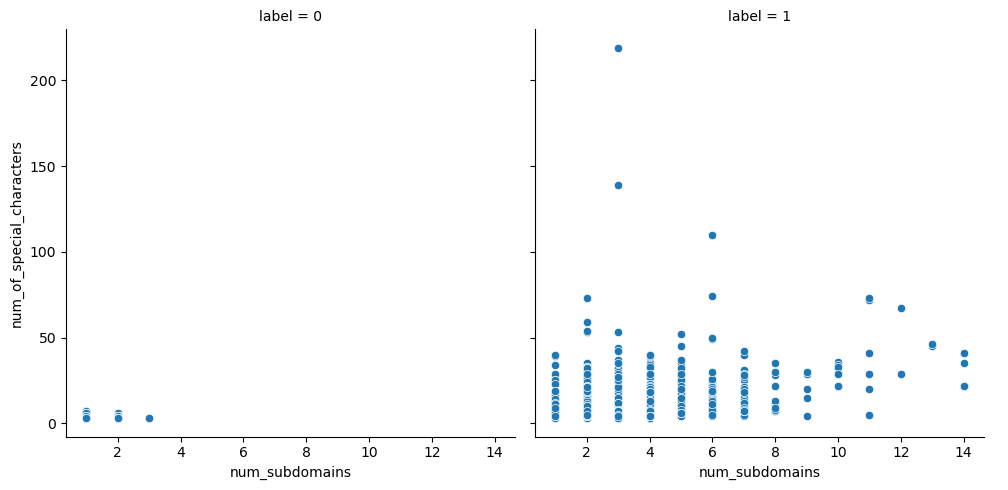

In [29]:
# facet grid of length of title vs length of text across label
g = sns.FacetGrid(df2, col="label", height=5)
g.map(sns.scatterplot, "length_of_title", "length_of_text")
g.add_legend()
plt.show()

# facet grid of number of inputs vs number of buttons across label
g = sns.FacetGrid(df2, col="label", height=5)
g.map(sns.scatterplot, "number_of_clickable_button", "number_of_buttons")
g.add_legend()
plt.show()

# facet grid of number of subdomains vs number of special characters across label
g = sns.FacetGrid(df2, col="label", height=5)
g.map(sns.scatterplot, 'num_subdomains', 'num_of_special_characters')
g.add_legend()
plt.show()

## Spitting the dataset

To avoid data leakage during modelling, the dataset will be split into predictors (`X`) and target (`y`) columns.

The predictors will be split into testing and training sets with a `random_seed = 42` which will be consistent in the entire notebook.

The test size will remain as default `test_size = 0.25`

We will also introduce `stratify = y` parameter to ensure the train and test sets are split equally.

In [30]:
from sklearn.model_selection import train_test_split

# splitting df into X and y
X = df2.drop(columns = ['label'], axis = 1)
y = df2['label']

# performing train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [31]:
print("Train percent phishing/legitimate:", y_train.value_counts(normalize=True)[1])
print("Test percent phishing/legitimate: ", y_test.value_counts(normalize=True)[1])

Train percent phishing/legitimate: 0.5
Test percent phishing/legitimate:  0.5


## A) Logistic Regression Modelling

### Vanilla Model

We will first fit, train and evaluate a machine learning algorithm with its default settings. This will help us establish a baseline to compare with other algorithms whose parameters have been tuned.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# instantiating a LogisticRegression with random_state=42
vanilla_model = LogisticRegression(random_state = 42)

# using cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
vanilla_neg_log_loss_cv = cross_val_score(vanilla_model, X_train, y_train, scoring = "neg_log_loss")

vanilla_log_loss = -(vanilla_neg_log_loss_cv.mean())
vanilla_log_loss

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

0.21724785027512397

- The code above is producing a `ConvergenceWarning` warning because we have not scaled the data. We are getting a warning five times (once for each fold of cross validation). 

Is a log loss of around 0.217 a "good" log loss? That's hard to say because log loss is not particularly interpretable. 

If we had a model that just chose 0 every time, this is the log loss we would get:

In [33]:
from sklearn.metrics import log_loss
import numpy as np

log_loss(y_train, np.zeros(len(y_train)))

18.021826694558573

- Loss is a metric where lower is better, so our vanilla model is clearly an improvement over just guessing the one class every time.

- Even though it is difficult to interpret, the 0.217 value will be a useful baseline as we continue modeling, to see if we are actually making improvements or just getting slightly better performance by chance.

- We will also use other metrics at the last step in order to describe the final model's performance in a more user-friendly way.

### Building and Evaluating Additional Logistic Regression Models

#### Preprocessing steps

**1. Log transformation** - the purpose of log transformation is making the data to be normally distributed. However, this is not necessary as one of the assumptions in Logistic Regression is normality is not required. We will skip this step.

**2. Scaling** - is done for the following reasons:

   - to ensure that each feature contributes more equally to the model's outcome.

   - to allow comparison of the importance of different features on the same weight level.

   - to allow proper regularization.

   - gradient-based optimization algorithms (like Gradient Descent) used to fit logistic regression models converge faster when the feature values are on a similar scale.

#### Using `StratifiedKFold`

`StratifiedKFold` provides the information we need to make 5 separate train-test splits inside of `X_train`. Then there is other logic within `cross_val_score` to fit and evaluate the provided model.

We will use `StratifiedKFold` "by hand" because this approach allows us to customize what happens inside of the function as compared to the much-shorter `cross_val_score` approach.

We will apply the scaling preprocessing technique by fitting a `StandardScaler` object on the training subset (not the full training data) and transform both the train and test subsets.

In [34]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# creating neg log loss
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

#instantiating the model
baseline_model = LogisticRegression(random_state=42)

# creating a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# instantiating a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    
    # extracting train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # cloning the provided model and fit it on the train subset
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # evaluating the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (st

0.21724785027512397

- We are getting a `ConvergenceWarning` again because our data is not scaled.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

def custom_cross_val_score(estimator, X, y):
    
    # creating a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # instantiating a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        
        # extracting train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # instantiating StandardScaler
        scaler = StandardScaler()
        
        # fitting and transforming X_t
        X_t_scaled = scaler.fit_transform(X_t)
        
        # transforming X_val
        X_val_scaled = scaler.fit_transform(X_val)
        
        # cloning the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_scaled, y_t)
        
        # evaluating the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_scaled, y_t)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores
        
# model with preprocessing
model_with_preprocessing = LogisticRegression(random_state=42)
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
print(-(preprocessed_neg_log_loss_cv.mean()))

0.035361671672368825


- The `ConvergenceWarning` no longer exists because we have standardized our data.

Let's compare that to our baseline log loss:

In [36]:
print(-vanilla_neg_log_loss_cv.mean())
print(-preprocessed_neg_log_loss_cv.mean())

0.21724785027512397
0.035361671672368825


- Looks like our preprocessing with `StandardScaler` has provided major improvement over the baseline! Let's move on to building more logistic models.

Now that we have applied appropriate preprocessing steps to our data in our custom cross validation function, we can reuse that function to test multiple different `LogisticRegression` models.

### 1. Feature Selection 

We had previously done feature selection by eliminating features with variance less than 0.01. What if we used the machine learning Recursive Feature Elimination technique?
We are going to set the `n_features_to_select` parameter to half of the features.

In [37]:
X.shape

(50000, 43)

In [38]:
import time
from sklearn.feature_selection import RFE

# getting feature names
feature_names = X.columns

# creating a base logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

# initializing RFE with the base logistic regression model
rfe = RFE(estimator=logreg, n_features_to_select=22)  # Select top 22 features

# measure time taken for RFE (The process was taking so long so I wanted to see how long it takes to finish)
start_time = time.time()
rfe.fit(X, y)
end_time = time.time()

print("Time taken for RFE:", end_time - start_time, "seconds")
print()

# ranking of features and selected features
print("Feature Ranking:", rfe.ranking_)
print()
print("Selected Features:", rfe.support_)
print()

# geting names of features are selected
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
print("Selected Feature Names:", selected_features)

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time taken for RFE: 145.1473970413208 seconds

Feature Ranking: [ 1  1  1  2  1  1  1  1  7 16 11 12 10  5  4  9 18 21  6  1  1  1 22 15
 17  8 20 14  1  1  1  1  1  3  1  1 13 19  1  1  1  1  1]

Selected Features: [ True  True  True False  True  True  True  True False False False False
 False False False False False False False  True  True  True False False
 False False False False  True  True  True  True  True False  True  True
 False False  True  True  True  True  True]

Selected Feature Names: ['has_title', 'has_input', 'has_button', 'has_link', 'has_password', 'has_email_input', 'has_hidden_element', 'has_h1', 'has_h2', 'has_h3', 'has_footer', 'has_form', 'has_text_area', 'has_iframe', 'has_text_input', 'has_nav', 'has_picture', 'number_of_table', 'url_length', 'num_subdomains', 'has_https', 'num_of_special_characters']


In [39]:
# creating a new dataset with selected features
X_train_selected = X_train[selected_features]

# modelling with selected features
model_with_selected_features = LogisticRegression(solver='lbfgs', max_iter=10000)

# getting new cross-validation scores with selected features
selected_features_train_scores, selected_features_neg_log_loss_cv = custom_cross_val_score(model_with_selected_features, X_train_selected, y_train)

# printing the results
print("Preprocessed Model")
print("Train average:", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print()

print("Selected Features Model")
print("Train average with selected features:", -selected_features_train_scores.mean())
print("Validation average with selected features:", -selected_features_neg_log_loss_cv.mean())

Preprocessed Model
Train average: 0.026730090653893444
Validation average: 0.035361671672368825

Selected Features Model
Train average with selected features: 0.028798220361995124
Validation average with selected features: 0.03637150470930341


- Feature selecting does not seem to improve the scores hence, we proceed to hyper-parameter tuning using the model with preprocessed features (`model_with_preprocessing`).

### 2. Hyper-parameter Tuning

In [40]:
print("Train:     ", -preprocessed_train_scores)
print("Validation:", -preprocessed_neg_log_loss_cv)

Train:      [0.02601888 0.02736821 0.02706735 0.02641648 0.02677953]
Validation: [0.03155683 0.04403277 0.03067584 0.03628241 0.0342605 ]


- The **training log loss scores** are relatively low and consistent, indicating the model fits the training data well.
- The **validation log loss scores** are higher than the training scores, with some variability across folds.

**Analysis**

- **Overfitting** - This situation suggests potential overfitting, where the model performs significantly better on the training data than on the validation data. Overfitting means that the model has learned the training data's details and noise to the extent that it negatively impacts its performance on new data (validation set).
- **Underfitting** - If both the training and validation scores were high, it would indicate underfitting, where the model is too simple to capture the underlying patterns in the data.

**Conclusion**
The model appears to be overfitting because it performs better on the the training data than on validation data.  

#### 1) Increasing Regularization

It's actually possible that we are overfitting due to too low of regularization.

Let's look at the default `LogisticRegression` parameters.

In [41]:
model_with_preprocessing.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

- `'C': 1.0`, specifies the regularization strength. We want to increase regularization strength in our logistic regression model by adjusting the C parameter. A smaller C increases regularization.

In an overfitting scenario we decreace `c` to increase regularization.

In [42]:
model_less_regularization = LogisticRegression(random_state = 42, C = 1e-1)

less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(model_less_regularization, X_train, y_train)

print("Preprocessed Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print()

print("Less Regularization Model")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())

Preprocessed Model
Train average:      0.026730090653893444
Validation average: 0.035361671672368825

Less Regularization Model
Train average:      0.03210692872796539
Validation average: 0.03493023678292243


- Our current model scores are worse than the previous model scores. We are having a change of `training average` from `0.0267` to `0.0321` and `validation average` from `0.0353` to `0.0349`. 

These are metrics where lower is better so let's try reducing the hyper-parameter `C` even further.

In [43]:
model_lesser_regularization = LogisticRegression(random_state = 42, C = 1e-6)

lesser_regularization_train_scores, lesser_regularization_val_scores = custom_cross_val_score(model_lesser_regularization, X_train, y_train)

print("Preprocessed Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print()
print("Even Lesser Regularization Model")
print("Train average:     ", -lesser_regularization_train_scores.mean())
print("Validation average:", -lesser_regularization_val_scores.mean())

Preprocessed Model
Train average:      0.026730090653893444
Validation average: 0.035361671672368825

Even Lesser Regularization Model
Train average:      0.6560034903687931
Validation average: 0.6556157562091968


- The scores are even worse.

Let's employ a pipeline to perform a more granular search of the value of `C` across orders of magnitude using grid-search.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# creating a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # feature scaling
    ('logreg', LogisticRegression(solver='lbfgs', max_iter=10000))  # logistic regression
])

# defining the parameter grid for C
param_grid = {
    'logreg__C': [1e-15, 1e-10, 1e-2, 1]  # Example values for C
}

# initializing GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# fitting GridSearchCV
grid_search.fit(X, y)

# getting the best parameter and score
print(f"Best C value: {grid_search.best_params_['logreg__C']}")
print(f"Best score: {grid_search.best_score_}")

Best C value: 1
Best score: 0.99168


From the above outcome, we get the hyper-parameter `C` set to default `1.0` is the best value. Reducing the hyper-parameter `C` does not make our model better hence we will proceed with the model with preprocessed features `model_with_preprocessing`.

#### 2) Alternative Hyper-parameters

We are going to create pipelines for `penalty`, `l1_ratio` and `solver` to perform a `GridSearch` to get the best values for each parameters.

In [45]:
# creating a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('logreg', LogisticRegression(max_iter=10000)) 
])

# Define the parameter grid for C
param_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Output the best parameter and score
print(f"Best Penalty value: {grid_search.best_params_['logreg__penalty']}")
print(f"Best score: {grid_search.best_score_}")

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\pipeline.

Best Penalty value: l2
Best score: 0.99168


In [46]:
# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression(max_iter=10000))  # Logistic regression
])

# Define the parameter grid for C
param_grid = {
    'logreg__l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Output the best parameter and score
print(f"Best l1 ratio: {grid_search.best_params_['logreg__l1_ratio']}")
print(f"Best score: {grid_search.best_score_}")

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (pena

Best l1 ratio: 0.1
Best score: 0.99168


In [47]:
# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression(max_iter=10000))  # Logistic regression
])

# Define the parameter grid for C
param_grid = {
    'logreg__solver': ['lbfgs', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Output the best parameter and score
print(f"Best Solver value: {grid_search.best_params_['logreg__solver']}")
print(f"Best score: {grid_search.best_score_}")

Best Solver value: lbfgs
Best score: 0.99168


- The output that we are getting is the `LogisticRegression` default parameters are actually the best. That is `solver = 'lbfgs'`, `penalty = 'l2'` and `l1_ratio = 0.1`.

But what will happen if we employ `solver = 'saga'`, `penalty = 'elasticnet'` and `l1_ratio = 0.5`?

In [48]:
model_alternative_solver = LogisticRegression(random_state = 42, solver = 'saga', penalty="elasticnet", l1_ratio=0.5)

alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(model_alternative_solver, X_train, y_train)

print("Preprocessed Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print()
print("Alternative Solver Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Preprocessed Model
Train average:      0.026730090653893444
Validation average: 0.035361671672368825

Alternative Solver Model
Train average:      0.051324353914222264
Validation average: 0.05163664742452343


C:\Users\Claude\.conda\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- The scores have only gotten worse which proves the output that was produced by the pipelines was actually correct.
- We are getting `ConvergenceWarnings` again, even though we are scaling the data inside of `custom_cross_val_score`.

We are going to modify the `tol` and `max_iter` parameters to address this issue.

#### 3) Adjusting Gradient Descent Parameters

The `tol` (tolerance) specifies how close to zero the gradient must be in order to stop taking additional steps. It's possible that our model is finding a gradient that is close enough to zero, but slightly above the default tolerance.

We are getting slightly worse metrics on both the train and the validation data, so increasing the number of iterations (`max_iter`) seems like a better strategy. This will allow the gradient descent algorithm to take more steps as it tries to find an optimal solution.



In [49]:
# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression(max_iter=10000))  # Logistic regression
])

# Define the parameter grid for C
param_grid = {
    'logreg__tol': [0.0001, 0.001, 0.0007, 0.0004]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Output the best parameter and score
print(f"tol value: {grid_search.best_params_['logreg__tol']}")
print(f"Best score: {grid_search.best_score_}")

tol value: 0.0001
Best score: 0.99168


Despite the grid search telling us the best `tol` value is the default one `0.0001` we are going to increase it to see what output we will have.

In the cell below, we will create a model called `model_more_iterations` that has the same hyperparameters as `model_alternative_solver`, with the addition of an increased `max_iter` and a higher `tol` value.

In [50]:
model_more_iterations = LogisticRegression(random_state = 42, solver = 'saga', penalty="elasticnet", l1_ratio=0.5, max_iter = 2000, tol = 0.001)

more_iterations_train_scores, more_iterations_val_scores = custom_cross_val_score(model_more_iterations, X_train, y_train)

print("Preprocessed Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print()
print("Alternative Solver Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())
print()
print("More iterations Model")
print("Train average:     ", -more_iterations_train_scores.mean())
print("Validation average:", -more_iterations_val_scores.mean())

Preprocessed Model
Train average:      0.026730090653893444
Validation average: 0.035361671672368825

Alternative Solver Model
Train average:      0.051324353914222264
Validation average: 0.05163664742452343

More iterations Model
Train average:      0.03966790771036333
Validation average: 0.04106350756900212


- We are still not getting scores better than the model with preprocessed values.
- Why is this? This is because the default hyperparameters are the default because they work best in the most situations. This is especially true of logistic regression, which has relatively few hyperparameters.

We are going to declare the `model_with_preprocessing` to be our best model, and move on to the final evaluation phase.

### Choosing a Final Model

In [51]:
final_model = model_with_preprocessing

### Preprocessing the Full Dataset

In order to evaluate our final model, we need to preprocess the full training and test data, fit the model on the full training data, and evaluate it on the full test data. Initially we'll continue to use log loss for the evaluation step.

In [52]:
# instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.fit_transform(X_test)

### Fitting the Model on the Full Training Data

In [53]:
final_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

## Evaluating the Model on the Test Data

#### 1. Log Loss

In [54]:
log_loss(y_test, final_model.predict_proba(X_test_scaled))

0.03431814692456334

Models perform better with more training data, hence the better performance when we train the model with the full training set.

This model has an improved log loss of `0.0343` compared to our initial vanilla model, which had about `0.217`.

#### 2. Accuracy

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, final_model.predict(X_test_scaled)) * 100

99.016

Our model correctly identifies whether a website is legitimate or phishing about 99% of the time.

#### 3. Precision

In [56]:
from sklearn.metrics import precision_score

precision_score(y_test, final_model.predict(X_test_scaled)) * 100

99.77254264825345

If our model labels a given cell as class 1, there is about a 99.8% chance that it is actually class 1 (phishing) and about a 0.2% chance that it is actually class 0 (legitimate).

#### 4. Recall

In [57]:
from sklearn.metrics import recall_score

recall_score(y_test, final_model.predict(X_test_scaled)) * 100

98.256

If a given cell is actually class 1, there is about a 98.3% chance that our model will correctly label it as class 1 (phishing) and about a 1.7% chance that our model will incorrectly label it as class 0 (legitimate).

### Summary
- That marks the end of Logistic Regression Modelling.
- The model with the preprocessed values and default hyper-parameters is concluded to be the best with an accuracy and precision of 99%. 

## B) Decision Tree Classifier Modelling

The Logistic Regression model produced very good results but who is to say we cannot get even better ones?

We are going to explore the Decision Tree Classifier model to mitigate any bias.

### Training a vanilla classifier

We are going to instantiate a decision tree using the `entropy` criterion and set the `random_state = 42` to ensure that the data splits are consistent compared to the logistic regression model.

This consistency allows for a fair comparison of model performance since the models will be trained and evaluated on the same subsets of data.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# training the classifier using training data 
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Making predictions

We are going to create a set of predictions using the test set.
Then we we use `y_test` and `y_pred` to calculate the AUC (Area under the curve) to check the predictive performance.

In [59]:
# making predictions using test set 
y_pred = dt.predict(X_test)

# checking the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.98968

AUC (Area Under the Curve) represents the performance the model in distinguishing between the positive and negative classes. Specifically, the AUC score is the area under the ROC (Receiver Operating Characteristic) curve, which plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings.

The AUC score of `0.98968` is very high, indicating that the model is performing well in terms of distinguishing between the classes. The closer the AUC is to 1.0, the better the model's performance.

### Hyper-parameter Tuning

Even though the AUC is high, there might still be room for improvement. While a high AUC is good, it’s important to ensure that the model generalizes well to unseen data. Tuning can help us find a more robust model that performs consistently under varying conditions.

#### 1. Maximum Tree Depth

The processes for getting the best depth parameter for our decision tree will be:

- Creating an array for `max_depth` values ranging from 1 - 32
- In a loop, train the classifier for each depth value (32 runs)
- Calculating the training and test AUC for each run
- Plotting a graph to show under/overfitting and the optimal value
- Interpreting the results

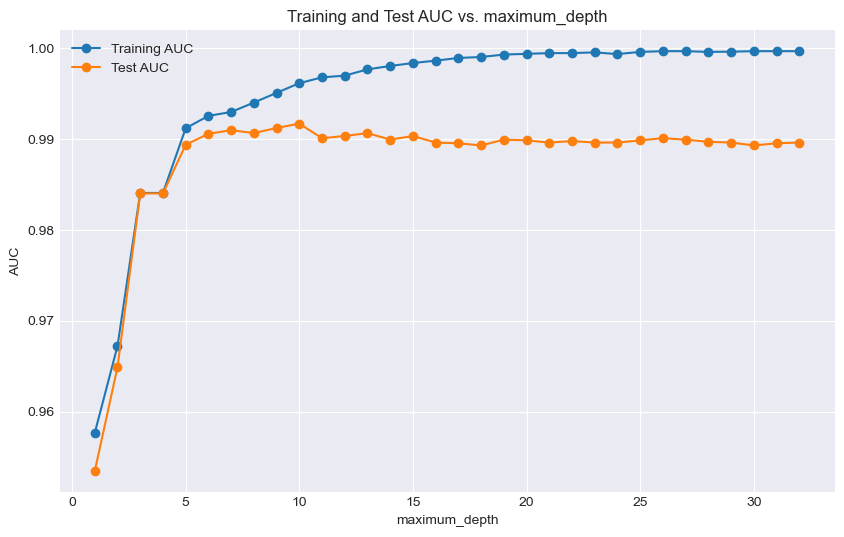

In [60]:
# Identify the optimal tree depth for given data
maximum_depth = list(range(1, 33))

train_auc = []
test_auc = []

for max_depth in maximum_depth:
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = 42)
    dtc.fit(X_train, y_train)
    
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(false_positive_rate, true_positive_rate)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(false_positive_rate, true_positive_rate)

    train_auc.append(roc_auc_train)
    test_auc.append(roc_auc_test)

plt.figure(figsize=(10, 6))
plt.plot(maximum_depth, train_auc, label='Training AUC', marker='o')
plt.plot(maximum_depth, test_auc, label='Test AUC', marker='o')
plt.xlabel('maximum_depth')
plt.ylabel('AUC')
plt.title('Training and Test AUC vs. maximum_depth')
plt.legend()
plt.grid(True)
plt.show()

 - The training AUC keeps increasing as `max_depth` increases, which is expected since the model becomes more complex and can fit the training data better.
- The test AUC, however, reaches a peak and then slightly decreases as `max_depth` continues to increase.
- From the provided `test_auc` values, the highest test AUC is around `0.99168` when `max_depth` is `10`. Beyond this point, the test AUC does not improve significantly and even starts to decrease slightly, indicating that the model may be overfitting at higher depths.
- Optimal `max_depth` value: 10

#### 2. Minimum Sample Split

The processes for getting the best `min_sample_splits` parameter for our decision tree will be:

- Creating an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1
- In a loop, train the classifier for each `min_sample_splits` value (10 runs)
- Calculating the training and test AUC for each run
- Plotting a graph to show under/overfitting and the optimal value
- Interpreting the results

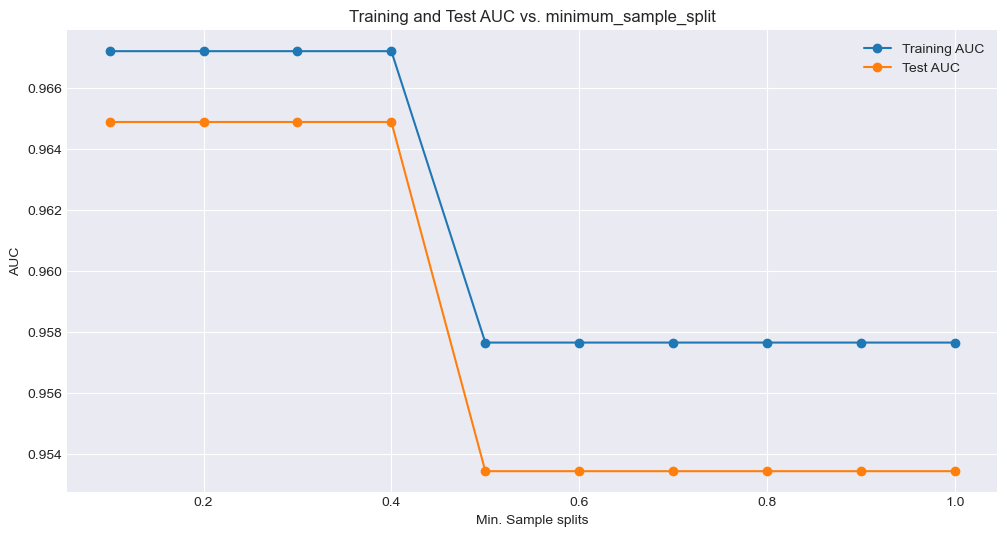

In [61]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, label='Training AUC', marker='o')
plt.plot(min_samples_splits, test_results, label='Test AUC', marker='o')
plt.xlabel('Min. Sample splits')
plt.ylabel('AUC')
plt.title('Training and Test AUC vs. minimum_sample_split')
plt.legend()
plt.grid(True)
plt.show()

- AUC for both test and train data stabilizes at 0.5. 
- Further increase in minimum sample split does not improve learning. 

#### 3. Minimum Sample Leafs

The processes for getting the best `min_samples_leafs` parameter for our decision tree will be:

- Creating an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1
- In a loop, train the classifier for each `min_sample_splits` value (5 runs)
- Calculating the training and test AUC for each run
- Plotting a graph to show under/overfitting and the optimal value
- Interpreting the results

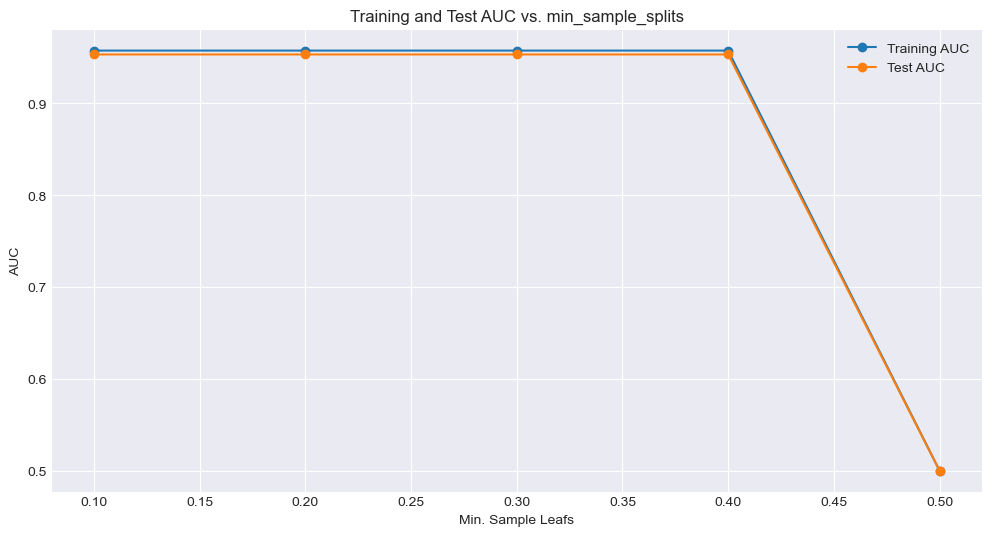

In [62]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, label='Training AUC', marker='o')
plt.plot(min_samples_leafs, test_results, label='Test AUC', marker='o')
plt.ylabel('AUC')
plt.xlabel('Min. Sample Leafs')
plt.title('Training and Test AUC vs. min_sample_splits')
plt.legend()
plt.grid(True)
plt.show()

- AUC gives best value between 0.1 and 0.4 for both test and training sets. We will go with 0.25.
- The accuracy drops down if we continue to increase the parameter value.

#### 4. Maximum Features

The processes for getting the best `max_features` parameter for our decision tree will be:

- Creating an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs)
- Calculating the training and test AUC for each run
- Plotting a graph to show under/overfitting and the optimal value
- Interpreting the results

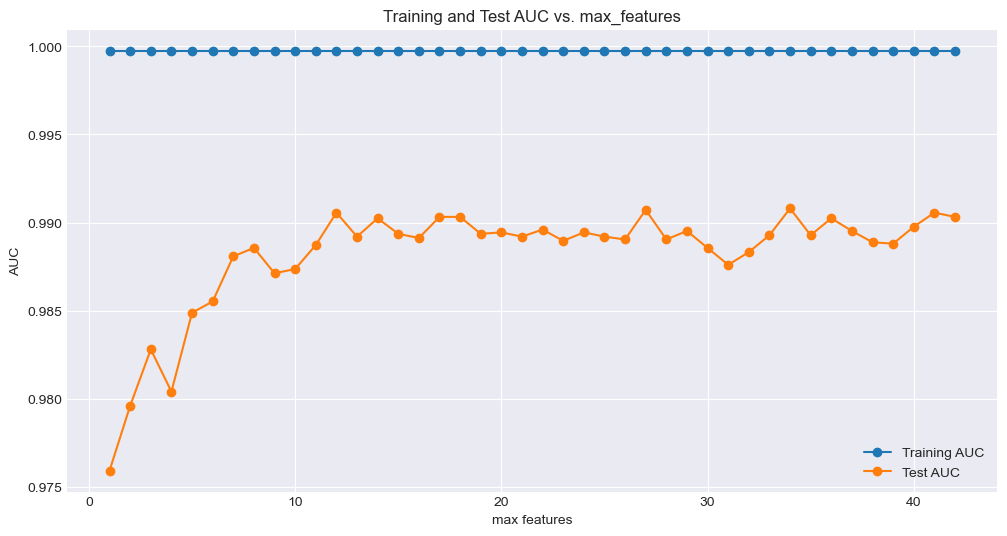

In [63]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, label='Training AUC', marker='o')
plt.plot(max_features, test_results, label='Test AUC', marker='o')
plt.ylabel('AUC')
plt.xlabel('max features')
plt.title('Training and Test AUC vs. max_features')
plt.legend()
plt.grid(True)
plt.show()

- Highest AUC value is seen at 34.

### Re-training the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance.

- Train the classifier with the optimal values identified
- Compare the AUC of the new model with the earlier vanilla decision tree AUC
- Interpret the results of the comparison

In [64]:
# Train a classifier with optimal values identified above
dtc = DecisionTreeClassifier(criterion='entropy',
                           max_features=34,
                           max_depth=10,
                           min_samples_split=0.5,
                           min_samples_leaf=0.25, 
                           random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9534400000000001

We actually have a worse AUC of `0.95344` than the vanilla classifier which has `0.98968`, because we tuned the hyper parameters one at a time.

We will continue with the vanilla model `dt`.

In [65]:
print("Accuracy:" ,accuracy_score(y_test, dt.predict(X_test)) * 100)
print("Precision:" ,precision_score(y_test, dt.predict(X_test)) * 100)
print("Recall:" ,recall_score(y_test, dt.predict(X_test)) * 100)

Accuracy: 99.032
Precision: 98.94585529468137
Recall: 99.11999999999999


- **Accuracy:** Our model correctly identifies whether a website is legitimate or phishing about 95% of the time.
- **Precision:** If a given cell is actually class 1, there is about a 94.7% chance that our model will correctly label it as class 1 (phishing) and about a 5.3% chance that our model will incorrectly label it as class 0 (legitimate).
- **Recall:** If a given cell is actually class 1, there is about a 96% chance that our model will correctly label it as class 1 (phishing) and about a 4% chance that our model will incorrectly label it as class 0 (legitimate).

### Summary
- That marks the end of Decision Tree Classifier Modelling.
- The model with the preprocessed values and default hyper-parameters is concluded to be the best with an accuracy and precision of 95%. 

## Findings

1. The best classification algrithm is the Logistic Regression Model because it correctly identifies whether a website is legitimate or phishing about 99% of the time. It superceeds the Decision Tree which correctly classifies 95% of the time.
 
2. All features apart from 4 were important for the predictions.

3. Both models produced very good performance metrics with the best Decision Tree model having ROC-AUC of 0.98 and Logistic Regression having a precision score of 99.7%. This means that both models can be used to effectively detect phishing attempts.

## Recommendations

- Chumz Bank should implement the Logistic Regression Model with it's default parameters and develop a phishing detection system into its security infrastructure to improve accuracy and adaptability.

- The model should be regularly updated with new data to maintain its effectiveness against evolving phishing techniques.

- To complement technical solutions, user education on identifying phishing attempts and practicing good cybersecurity hygiene shuld be conducted.